In [405]:
#pip install tweepy

# <font color='crimson'>Data Gathering Process</font>

In [502]:
import tweepy as tw
import pandas as pd
import numpy as np

import os
import requests
import json
import re

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

pd.set_option('display.max_colwidth', 500)

In [503]:
import warnings
warnings.filterwarnings("ignore")

### Part 1, get WeRateDogs Twitter archive, save data in df1

In [504]:
df1 = pd.read_csv('twitter_archive_enhanced.csv')
df1.shape

(2356, 17)

### Part 2, get tweet image predictions, save data in df2

In [505]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
tsv_file = open('tweet_image_predictions.tsv', 'wb')
tsv_file.write(response.content)
df2 = pd.read_csv('tweet_image_predictions.tsv', sep = '\t')
df2.shape

(2075, 12)

In [506]:
df2.isnull().sum().any()

False

### Part 3, get additional tweet attributes, save data in df3

In [507]:
#consumer_key = "kNpInx6nTmMg98WhCTag3je8P"
#consumer_secret = "Pu2CRE0jifgIL0vz36guRXveUarhu2xxuuhDhtnJmAkMqYQ9Gp"
#access_token = "1874013096-j8ai8JDdExj6JaGCMxKfkJoNbNnMHdRjWIpZULt"
#access_token_secret = "YvlmTYjgjIVB03KxqjPVHLpK7FWS2rKTImhbYTZCOykOV"

#auth = tw.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_token_secret)
#api = tw.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [508]:
#tweet_ids = df1.tweet_id.values
#count = 0
#error_dict = []
#with open('tweet_json.txt', 'w') as file:
#    for i in tweet_ids:
#        count = count + 1
#        print("No." + str(count) + ": " + str(i))        
#        try:
#            tweet = api.get_status(i, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, file)
#            file.write('\n')
#        except:
#            print("Fail")
#            error_dict.append(i)
#            pass

In [509]:
# print('There are ' + str(len(error_dict)) + ' broken tweets whose status cannot be retrieved.')

In [510]:
df3 = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet_json.txt') as file:
    for line in file:
        status = json.loads(line)
        id_str = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        df3 = df3.append(pd.DataFrame([[id_str, retweet_count, favorite_count]], 
                                      columns=['tweet_id', 'retweet_count', 'favorite_count']))
df3 = df3.reset_index(drop = True)
df3.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [511]:
# create backups before cleaning process

df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

# <font color='crimson'>Data Assessing Process</font>

### Part 1, df1 assessing

In [512]:
df1.head() # retweets shall be deleted, reply columns can be simplified (quality and tidiness issue)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [513]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [514]:
df1.rating_numerator.value_counts() # wrong rating numerators (quality issue)

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [515]:
df1.rating_denominator.value_counts() # wrong rating denominators (quality issue)

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [516]:
df1.isnull().sum() # many nulls (quality issue)

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [517]:
df1.dtypes # there are wrong datatypes (quality issue)

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [518]:
df1.expanded_urls.head(20) # repeated urls and urls from different sources (quality issue)

0                                                                                                                                                                                                     https://twitter.com/dog_rates/status/892420643555336193/photo/1
1                                                                                                                                                                                                     https://twitter.com/dog_rates/status/892177421306343426/photo/1
2                                                                                                                                                                                                     https://twitter.com/dog_rates/status/891815181378084864/photo/1
3                                                                                                                                                                                                     https://twitter.

In [519]:
df1.name.value_counts() # apparently wrong names "a" (quality issue)

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Nimbus       1
Miley        1
Major        1
Kane         1
Harry        1
Name: name, Length: 957, dtype: int64

In [520]:
df1.iloc[:, 13:] # those column names are wrong and they shall be unified (tidiness issue)

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
...,...,...,...,...
2351,None,None,None,None
2352,None,None,None,None
2353,None,None,None,None
2354,None,None,None,None


In [521]:
df1.source.value_counts() # verbose expression (quality issue)

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [522]:
df1.duplicated().sum()

0

### Part 2, df2 assessing

In [523]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [524]:
df2.isnull().sum().any()

False

In [525]:
df2.duplicated().sum()

0

In [526]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [527]:
df2.dtypes # wrong datatypes for id (quality issue)

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### Part 3, df3 assessing

In [528]:
df3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7302,34812
1,892177421306343426,5456,30158
2,891815181378084864,3596,22704
3,891689557279858688,7490,38064
4,891327558926688256,8049,36342


In [529]:
df3.describe()

,tweet_id,retweet_count,favorite_count
count,2209,2209,2209
unique,2096,1614,1927
top,731156023742988288,1195,3651
freq,17,18,17


In [530]:
df3.dtypes

tweet_id          object
retweet_count     object
favorite_count    object
dtype: object

In [531]:
df3.duplicated().sum() # duplicated rows shall be deleted (quality issue)

109

In [532]:
df3.isnull().sum().any()

False

# <font color='crimson'>Data Cleaning Process</font>

### <font color='royalblue'>Quality Issue 1: Delete Retweets</font>

#### Define

Retweets from other people are included in twitter_archive_enhanced.csv, those rows shall be removed to avoid multiple rating records for a single post.

#### Code

In [533]:
df1[df1.retweeted_status_id.notnull()].head(1) # find a retweet

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None


In [534]:
retweet_no_example = df1.retweeted_status_id[19]
df1[df1.tweet_id == retweet_no_example] # confirmed that retweet and the original rating are talking about the same dog (post)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None


In [535]:
retweet_index = df1[df1.retweeted_status_id.notnull()].index
df1.drop(retweet_index, inplace=True)

#### Test

In [536]:
df1.retweeted_status_id.unique()

array([nan])

In [537]:
df1.retweeted_status_user_id.unique()

array([nan])

In [538]:
df1.retweeted_status_timestamp.unique() # now, all values in retweet related columns are deleted

array([nan], dtype=object)

In [539]:
df1.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], 
         axis = 1, inplace = True) # delete those unnecessary columns

In [540]:
df1.isnull().sum()

tweet_id                    0
in_reply_to_status_id    2097
in_reply_to_user_id      2097
timestamp                   0
source                      0
text                        0
expanded_urls              58
rating_numerator            0
rating_denominator          0
name                        0
doggo                       0
floofer                     0
pupper                      0
puppo                       0
dtype: int64

### <font color='royalblue'>Quality Issue 2: Drop Useless Columns</font>

#### Define

There are also some other unecessary columns that takes storage and most values are NaN. 

Here we can replace two verbose columns: in_reply_to_status_id and in_reply_to_user_id with only one column: in_reply, to reflect whether certain ratings are given in original post (0), or in reply (1).

#### Code

In [541]:
index1 = df1[df1.in_reply_to_status_id.notnull()].index
index2 = df1[df1.in_reply_to_user_id.notnull()].index
(index1 == index2).all()

True

In [542]:
in_reply = []
for i in range(df1.shape[0]):
    if i in index1:
        in_reply.append(1)
    else:
        in_reply.append(0)
df1 = df1.assign(in_reply = in_reply) # add a column to indicate whether the original rating is a reply or not

In [543]:
df1.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], 
         axis = 1, inplace = True) # delete those columns

#### Test

In [544]:
df1.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,in_reply
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,0


In [545]:
df1.in_reply.value_counts() # 0 means it's original post, 1 means it's a reply from WeRateDogs

# reply to WeRateDogs are already deleted

0    2099
1      76
Name: in_reply, dtype: int64

### <font color='royalblue'>Quality Issue 3: Change Wrong Datatypes</font>

#### Define

In all three dataframes, there are wrong datatypes:

1) timestamps shall be datetypes, not strings

2) id values shall be strings, not integer

#### Code

In [546]:
df1.dtypes

tweet_id               int64
timestamp             object
source                object
text                  object
expanded_urls         object
rating_numerator       int64
rating_denominator     int64
name                  object
doggo                 object
floofer               object
pupper                object
puppo                 object
in_reply               int64
dtype: object

In [547]:
df1.timestamp = pd.to_datetime(df1.timestamp)
df1.tweet_id = df1.tweet_id.astype(str)
df2.tweet_id = df2.tweet_id.astype(str)
df3.tweet_id = df3.tweet_id.astype(str) # change every wrong datatypes

#### Test

In [548]:
df1.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
in_reply                            int64
dtype: object

In [549]:
df2.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [550]:
df3.dtypes

tweet_id          object
retweet_count     object
favorite_count    object
dtype: object

### <font color='royalblue'>Quality Issue 4: Simplify Source</font>

### Define

In column "source" in twitter_archive_enhanced.csv, values are very verbose and actually they can be reflected by simple words, to indicate info source.

#### Code

In [551]:
df1.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [552]:
simplified_source = []
for i in df1.source:
    if 'iPhone' in i:
        simplified_source.append('iPhone')
    elif 'Web' in i:
        simplified_source.append('Web Client')
    elif 'Vine' in i:
        simplified_source.append('Vine')
    elif 'Deck' in i:
        simplified_source.append('TweetDeck')
    else:
        print('Method needs to be fixed')

In [553]:
df1.source = simplified_source

#### Test

In [554]:
df1.source.value_counts()

iPhone        2042
Vine            91
Web Client      31
TweetDeck       11
Name: source, dtype: int64

### <font color='royalblue'>Quality Issue 5: Delete Duplicated URLs</font>
### <font color='royalblue'>Tidiness Issue 1: Separate Column that has Multiple Category URLs</font>

#### Define

In column "expanded_urls" in twitter_archive_enhanced.csv, there are lots of urls, some of them are Twitter urls, some are not, and there are many cells that have repeated urls.

1) those repeated urls shall be removed.

2) two columns can be used, one for Twitter urls, one for other urls if applicable, to make dataframe more readable.

#### Code

In [555]:
df1[df1.expanded_urls.isnull()].head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,in_reply
30,886267009285017600,2017-07-15 16:51:35+00:00,iPhone,@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,12,10,None,None,None,None,None,0
55,881633300179243008,2017-07-02 21:58:53+00:00,iPhone,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,17,10,None,None,None,None,None,0
64,879674319642796034,2017-06-27 12:14:36+00:00,iPhone,@RealKentMurphy 14/10 confirmed,NaN,14,10,None,None,None,None,None,0
113,870726314365509632,2017-06-02 19:38:25+00:00,iPhone,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,10,10,None,None,None,None,None,0
148,863427515083354112,2017-05-13 16:15:35+00:00,iPhone,"@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,12,10,None,None,None,None,None,0


In [556]:
df1[df1.expanded_urls.isnull()].text[55] # just no URLs for those rows

'@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s'

In [557]:
df1.drop(df1[df1.expanded_urls.isnull()].index, inplace=True)

In [558]:
df1.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
in_reply              0
dtype: int64

In [559]:
var = 0
for i in df1.expanded_urls:
    if ',' in i:
        urls = i.split(',')
        print(urls)
        var += 1
    if var > 10:
        break 
# for a tweet with N photos, N identical twitter URLs will be found, sometimes we can see gofundme or other URLs at first

['https://twitter.com/dog_rates/status/891327558926688256/photo/1', 'https://twitter.com/dog_rates/status/891327558926688256/photo/1']
['https://gofundme.com/ydvmve-surgery-for-jax', 'https://twitter.com/dog_rates/status/890971913173991426/photo/1']
['https://twitter.com/dog_rates/status/890729181411237888/photo/1', 'https://twitter.com/dog_rates/status/890729181411237888/photo/1']
['https://twitter.com/dog_rates/status/890006608113172480/photo/1', 'https://twitter.com/dog_rates/status/890006608113172480/photo/1']
['https://twitter.com/dog_rates/status/889638837579907072/photo/1', 'https://twitter.com/dog_rates/status/889638837579907072/photo/1']
['https://twitter.com/dog_rates/status/888804989199671297/photo/1', 'https://twitter.com/dog_rates/status/888804989199671297/photo/1']
['https://twitter.com/dog_rates/status/888554962724278272/photo/1', 'https://twitter.com/dog_rates/status/888554962724278272/photo/1', 'https://twitter.com/dog_rates/status/888554962724278272/photo/1', 'https:/

In [560]:
twitter_url = []
extra_url = []
for i in df1.expanded_urls:
    if ',' in i:
        urls = i.split(',')
        if 'twitter' in urls[0]:
            twitter_url.append(urls[0].split('/photo')[0])
            extra_url.append('None')
        else:
            twitter_url.append(urls[1].split('/photo')[0])
            extra_url.append(urls[0])
    else:
        twitter_url.append(i.split('/photo')[0])
        extra_url.append('None')

In [561]:
df1 = df1.assign(twitter_url = twitter_url)
df1 = df1.assign(extra_url = extra_url)
df1.drop(['expanded_urls'], axis = 1, inplace = True)

#### Test

In [562]:
df1.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,in_reply,twitter_url,extra_url
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None,0,https://twitter.com/dog_rates/status/892420643555336193,None
1,892177421306343426,2017-08-01 00:17:27+00:00,iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None,0,https://twitter.com/dog_rates/status/892177421306343426,None
2,891815181378084864,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None,0,https://twitter.com/dog_rates/status/891815181378084864,None


### <font color='royalblue'>Quality Issue 6: Change Wrong Dog Names</font>

#### Define

For the column of dog names, there are two major problems: 

1) some names are actually mistakenly extracted from text.

2) some texts contain names, but didn't be extracted.

How we identify cells that need to be fixed or re-extracted? Here are they:

1) the names started with lower case.

2) the names with only one single upper case.

3) the names of "None" (not extracted)

The new method is: take the word after "named" for the cells above, store them. If there is no "named" in the text, they will be "None" for names. Originally, people already applied one method for all cells (take the word after "is"), so we just need to apply another widely applicable method for those suspicious cells.

#### Code

In [563]:
df1.name.value_counts() # there are 55 dogs called "a", shall be wrong inputs

None       622
a           55
Charlie     11
Lucy        11
Oliver      10
          ... 
Tiger        1
Amber        1
Berb         1
Liam         1
Harry        1
Name: name, Length: 956, dtype: int64

In [564]:
df1[df1.name == 'a'].text.tail(20) # apparently some of those dogs do have names

2211     Here is a horned dog. Much grace. Can jump over moons (dam!). Paws not soft. Bad at barking. 7/10 can still pet tho https://t.co/2Su7gmsnZm
2218      This is a Birmingham Quagmire named Chuk. Loves to relax and watch the game while sippin on that iced mocha. 10/10 https://t.co/HvNg9JWxFt
2222         Here is a mother dog caring for her pups. Snazzy red mohawk. Doesn't wag tail. Pups look confused. Overall 4/10 https://t.co/YOHe6lf09m
2235               This is a Trans Siberian Kellogg named Alfonso. Huge ass eyeballs. Actually Dobby from Harry Potter. 7/10 https://t.co/XpseHBlAAb
2249    This is a Shotokon Macadamia mix named Cheryl. Sophisticated af. Looks like a disappointed librarian. Shh (lol) 9/10 https://t.co/J4GnJ5Swba
2255        This is a rare Hungarian Pinot named Jessiga. She is either mid-stroke or got stuck in the washing machine. 8/10 https://t.co/ZU0i0KJyqD
2264                          This is a southwest Coriander named Klint. Hat looks expensive. Still on hou

In [565]:
name_list = df1.name.unique()
wrong_name = []
for i in name_list:
    if not re.search('[A-Z]', i) or len(i) <= 1:
        wrong_name.append(i)
wrong_name.append('None') # a list of wrong names or lack of names
print(wrong_name)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'O', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space', 'None']


In [566]:
wrong_name_index = df1.query("name == @wrong_name").index
new_name = []
for i in wrong_name_index:
    words = df1.text[i].split()
    if 'named' in words:
        new_name.append(re.findall('[a-zA-Z]+', words[words.index('named')+1])[0])
    else:
        new_name.append('None') # get dog names by a new method: extract the word after "named"

#### Test

In [567]:
pd.options.mode.chained_assignment = None
df1.name[wrong_name_index] = new_name
df1.name.value_counts()

None       704
Charlie     11
Lucy        11
Cooper      10
Oliver      10
          ... 
Tove         1
Johm         1
Opie         1
Lolo         1
Harry        1
Name: name, Length: 949, dtype: int64

In [568]:
name_list = df1.name.unique()
wrong_name = []
for i in name_list:
    if not re.search('[A-Z]', i) or len(i) <= 1:
        wrong_name.append(i)
wrong_name.append('None') # re-test weird names, shall be "None"
print(wrong_name)

['None']


### <font color='royalblue'>Quality Issue 7: Standardize and Correct Ratings</font>

#### Define

There are many wrong ratings or unstandardized ratings:

1) wrong ratings, such as regard 4/7 as rating, but actually it's a date in text.

2) unstandardized ratings: such as 40/50 for 5 dogs, it's fine but hard for further research.

#### Code

In [569]:
df1.rating_denominator.value_counts() # need to fix denominators above 10

10     2099
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [570]:
df1[df1.rating_denominator < 10].twitter_url

516     https://twitter.com/dog_rates/status/810984652412424192
2335    https://twitter.com/dog_rates/status/666287406224695296
Name: twitter_url, dtype: object

In [571]:
print(df1.text[516])
print('----')
print(df1.text[2335])

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
----
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


In [572]:
df1.drop(516, inplace=True) # no ratings given for Sam, should delete the row

In [573]:
df1.rating_denominator[2335] = 10
df1.rating_numerator[2335] = 9 # the rating is actually 9/10, not 1/2

In [574]:
df1.timestamp.dtypes

datetime64[ns, UTC]

In [575]:
df1[df1.rating_denominator == 11].twitter_url

1068    https://twitter.com/dog_rates/status/740373189193256964
1662    https://twitter.com/dog_rates/status/682962037429899265
Name: twitter_url, dtype: object

In [576]:
print(df1.text[1068])
print('----')
print(df1.text[1662])

After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
----
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5


In [577]:
df1.rating_denominator[1068] = 10
df1.rating_denominator[1662] = 10
df1.rating_numerator[1068] = 14
df1.rating_numerator[1662] = 10

In [578]:
df1 = df1.reset_index(drop = True)

In [579]:
index_10x = df1[df1.rating_denominator >= 20].index

In [580]:
for i in index_10x:
    print(df1.text[i])
    print('----')

The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
----
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
----
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
----
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
----
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
----
Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
----
Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
----
From left to right:
Cletus, Jerome, Alejandro, Burp, &amp; Titson
None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
----
Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa
----
Happy Wednesday here's a bucket of pups.

In [581]:
for i in index_10x:
    rep_num = (df1.rating_denominator[i]/10) - 1 # rows need to be replicated
    df1.rating_numerator[i] = 10*df1.rating_numerator[i]/df1.rating_denominator[i]
    df1.rating_denominator[i] = 10
#    rep_line = df1.iloc[i, :].repeat(1)
#    for h in range(int(rep_num)):
#        df1.loc[len(df1)] = rep_line # DON'T replicate rows with multiple dogs in a photo

In [582]:
df1.rating_numerator.value_counts() # still problems with numerators

12      493
10      439
11      423
13      295
9       155
8        98
7        51
14       41
5        34
6        32
3        19
4        15
2        10
1         4
0         2
75        1
26        1
27        1
1776      1
420       1
Name: rating_numerator, dtype: int64

In [583]:
index_wrong_num = df1[df1.rating_numerator > 20].index
print(index_wrong_num)
for i in index_wrong_num:
    print(df1.text[i])
    print('----')

Int64Index([530, 587, 771, 1485, 1839], dtype='int64')
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
----
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
----
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
----
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
----
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY
----


In [584]:
df1.rating_denominator.value_counts()

10    2116
Name: rating_denominator, dtype: int64

In [585]:
df1.rating_numerator[530] = 9.75
df1.rating_numerator[587] = 11.27
df1.rating_numerator[1485] = 11.26

# Besides, there is a very wild rating for a dog with a background of US flag: 1776 (The Declaration of Independence)
# Also, Snoop Dogg with rating of 420 (name of his song), keep it there at this moment

This can be used for another supplementary method, but I will skip here:

<font color = 'grey'>

rating = df1.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
    
rating.columns = ['rating_numerator', 'rating_denominator']

df1['rating_numerator'] = rating['rating_numerator'].astype(float)

df1['rating_denominator'] = rating['rating_denominator'].astype(float)
</font>

#### Test

In [586]:
df1.rating_denominator.value_counts() # they all shall be 10

10    2116
Name: rating_denominator, dtype: int64

In [587]:
df1.rating_numerator.value_counts() # except two large outliers mentioned above, rest shall be 0~14.

12      493
10      439
11      425
13      295
9       156
8        98
7        51
14       41
5        34
6        32
3        19
4        15
2        10
1         4
0         2
1776      1
420       1
Name: rating_numerator, dtype: int64

### <font color='royalblue'>Quality Issue 8: Correct Dog Categorization</font>

#### Define

Many dogs have more than one categorizations, which is due to:

1) there are multiple dogs in the photo. * We will deal with this tidiness issue later, to combine all columns into one.

2) there are multiple key words in a text and all of them are extracted, shall be fixed here.

#### Code

In [588]:
df1 = df1.reset_index(drop = True)

In [589]:
dup_index = []
for i in range(df1.shape[0]):
    dog_type = df1.iloc[i, 7:11].values.tolist()
    num = dog_type.count('None')
    if num < 3:
        dup_index.append(i) # list for dogs got categorized for multiple times
print(dup_index)

[156, 163, 360, 417, 442, 448, 538, 563, 690, 749, 851, 900]


In [590]:
df1.iloc[dup_index].iloc[:, 7:11]

,doggo,floofer,pupper,puppo
156,doggo,None,None,puppo
163,doggo,floofer,None,None
360,doggo,None,pupper,None
417,doggo,None,pupper,None
442,doggo,None,pupper,None
448,doggo,None,pupper,None
538,doggo,None,pupper,None
563,doggo,None,pupper,None
690,doggo,None,pupper,None
749,doggo,None,pupper,None


In [591]:
for i in dup_index:
    print(df1.text[i])
    print('----')

# here we can see the hard part: some of those category are wrong, but some of them actually contains multiple dogs

Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
----
At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
----
This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
----
Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
----
Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze
----
This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
----
This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 w

In [592]:
df1.doggo[156] = 'None'
df1.doggo[163] = 'None'
df1.pupper[360] = 'None'
df1.doggo[448] = 'None'
df1.pupper[538] = 'None' # change those mis-labelled dog categories

# rest will be kept since there are multiple dogs in images, will be put "pupper, doggo" instead

In [593]:
dup_index = []
for i in range(df1.shape[0]):
    dog_type = df1.iloc[i, 7:11].values.tolist()
    num = dog_type.count('None')
    if num < 3:
        dup_index.append(i) # shall be six rows left, that has multiple key words in text, are photos have multiple dogs
print(dup_index)

[417, 442, 563, 690, 749, 851, 900]


In [594]:
for i in dup_index:
    df1.pupper[i] = 'doggo, pupper'
    df1.doggo[i] = 'None'

In [595]:
df1.drop(749, inplace = True) # drop it since the pic is a couch

In [596]:
df1 = df1.reset_index(drop = True)

#### Test

In [597]:
dup_index = []
for i in range(df1.shape[0]):
    dog_type = df1.iloc[i, 7:11].values.tolist()
    num = dog_type.count('None')
    if num < 3:
        dup_index.append(i)
print(dup_index) # all repeated name problems are solved, ready to combine those columns

[]


### <font color='royalblue'>Tidiness Issue 2: Unify Dog Category Columns</font>

#### Define

There are four columns used for one attribute: dog category. This is a tidiness issue since only one column needed.

Before fixing the problem, we shall separate those rows that has multiple dog species.

#### Code

In [598]:
df1 = df1.reset_index(drop = True)

In [599]:
category = []
for i in range(df1.shape[0]):
    if df1.doggo[i] == 'doggo':
        category.append('doggo')
    elif df1.floofer[i] == 'floofer':
        category.append('floofer')
    elif df1.pupper[i] == 'pupper':
        category.append('pupper')
    elif df1.pupper[i] == 'doggo, pupper':
        category.append('doggo, pupper')
    elif df1.puppo[i] == 'puppo':
        category.append('puppo')
    else:
        category.append(np.nan) # TRUE isnull value
df1 = df1.assign(category = category)

In [600]:
df1.drop(['doggo', 'floofer', 'pupper', 'puppo'], 
         axis = 1, inplace = True) # delete those columns

#### Test

In [601]:
df1.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,in_reply,twitter_url,extra_url,category
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,0,https://twitter.com/dog_rates/status/892420643555336193,None,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,0,https://twitter.com/dog_rates/status/892177421306343426,None,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,0,https://twitter.com/dog_rates/status/891815181378084864,None,NaN


In [602]:
df1.category.value_counts()

pupper           223
doggo             74
puppo             24
floofer           10
doggo, pupper      6
Name: category, dtype: int64

In [603]:
df1.category.isnull().sum() # successful

1778

### <font color='royalblue'>Quality Issue 9: Repeated ID Removal</font>

#### Define

There are many repeated rows (IDs) in all dataframes, especially in the tsv file and txt file, which shall be removed.

#### Code

In [604]:
df3.retweet_count = df3.retweet_count.astype(int)
df3.favorite_count = df3.favorite_count.astype(int)

In [605]:
df2.tweet_id.value_counts() # no repeated ID in df2

750011400160841729    1
667534815156183040    1
727286334147182592    1
715342466308784130    1
670037189829525505    1
                     ..
672622327801233409    1
730211855403241472    1
720785406564900865    1
693231807727280129    1
803773340896923648    1
Name: tweet_id, Length: 2075, dtype: int64

In [606]:
df3.tweet_id.value_counts() # there are repeated IDs in df3

731156023742988288    17
758467244762497024    15
684225744407494656    13
677716515794329600    12
684222868335505415    11
                      ..
696100768806522880     1
879008229531029506     1
877316821321428993     1
884441805382717440     1
759923798737051648     1
Name: tweet_id, Length: 2096, dtype: int64

In [607]:
df3.drop_duplicates(inplace=True)

In [608]:
df3.tweet_id.value_counts() # there are still few duplicated ones

722974582966214656    2
733109485275860992    2
675853064436391936    2
758467244762497024    2
750011400160841729    1
                     ..
884441805382717440    1
831309418084069378    1
881906580714921986    1
672482722825261057    1
759923798737051648    1
Name: tweet_id, Length: 2096, dtype: int64

In [609]:
df3[df3.tweet_id == '722974582966214656'] # the second one is the correct one, same for rest pairs

,tweet_id,retweet_count,favorite_count
934,722974582966214656,1478,3906
2132,722974582966214656,1478,3904


In [610]:
list_sp = df3.tweet_id.value_counts()
for i in list_sp[list_sp > 1].index:
    df3.drop(df3[df3.tweet_id == i].index[1], inplace = True)

In [611]:
df3 = df3.reset_index(drop = True)

#### Test

In [612]:
df1.duplicated().sum()

0

In [613]:
df2.duplicated().sum()

0

In [614]:
df3.duplicated().sum()

0

### <font color='royalblue'>Tidiness Issue 3: Dataframe Combination and Storage</font>

In [615]:
df0 = pd.merge(df1, df2, on='tweet_id')
df = pd.merge(df0, df3, on='tweet_id')
df.shape

(1974, 24)

In [616]:
df.isnull().sum().any()

True

In [617]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'in_reply', 'twitter_url', 'extra_url',
       'category', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count',
       'favorite_count'],
      dtype='object')

In [618]:
df.drop_duplicates(inplace = True)
df = df.reset_index(drop = True)

In [619]:
df.to_csv('twitter_archive_master.csv', index = False) 

#### <font color='orange'>Warning: most "dogs" under a rating of 8 are actually not dogs...</font>

In [620]:
df[df.rating_numerator < 8].twitter_url # try to click on these pics...

39      https://twitter.com/dog_rates/status/883482846933004288
176     https://twitter.com/dog_rates/status/848212111729840128
232     https://twitter.com/dog_rates/status/835152434251116546
525     https://twitter.com/dog_rates/status/781661882474196992
548     https://twitter.com/dog_rates/status/777885040357281792
                                 ...                           
1960    https://twitter.com/dog_rates/status/666082916733198337
1967    https://twitter.com/dog_rates/status/666051853826850816
1969    https://twitter.com/dog_rates/status/666049248165822465
1970    https://twitter.com/dog_rates/status/666044226329800704
1972    https://twitter.com/dog_rates/status/666029285002620928
Name: twitter_url, Length: 164, dtype: object

# <font color='crimson'>Brief Data Analysis</font>

In [621]:
df.describe()

,rating_numerator,rating_denominator,in_reply,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1974.000000,1974.0,1974.000000,1974.000000,1974.000000,1.974000e+03,1.974000e+03,1974.000000,1974.000000
mean,11.437690,10.0,0.033941,1.202634,0.592653,1.346308e-01,6.047668e-02,2332.375380,7959.622087
std,39.795956,0.0,0.181124,0.561001,0.271711,1.003856e-01,5.088897e-02,4185.936442,11746.779888
min,0.000000,10.0,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,11.000000,69.000000
25%,10.000000,10.0,0.000000,1.000000,0.360998,5.432547e-02,1.641690e-02,518.500000,1684.000000
50%,11.000000,10.0,0.000000,1.000000,0.587026,1.178485e-01,4.975535e-02,1113.500000,3540.500000
75%,12.000000,10.0,0.000000,1.000000,0.841725,1.953582e-01,9.208967e-02,2655.750000,9896.500000
max,1776.000000,10.0,1.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,73694.000000,149527.000000


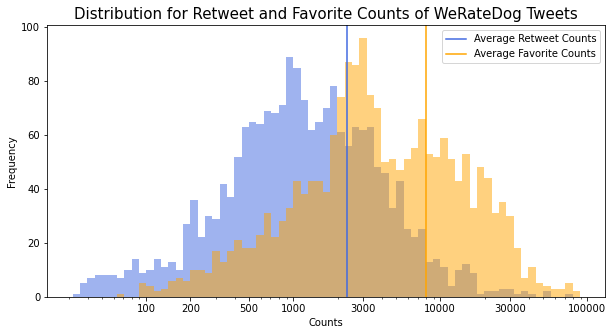

In [622]:
plt.figure(figsize=(10, 5));
bins = 10**np.arange(1.5, 5, 0.05);
retweet_mean = df.retweet_count.mean()
plt.axvline(retweet_mean, color = 'royalblue')
plt.hist(data = df, x = 'retweet_count', bins = bins, color = 'royalblue', alpha = 0.5);
favorite_mean = df.favorite_count.mean()
plt.axvline(favorite_mean, color = 'orange')
plt.hist(data = df, x = 'favorite_count', bins = bins, color = 'orange', alpha = 0.5);
plt.xscale('log');
ticks = [100, 200, 500, 1000, 3000, 10000, 30000, 100000];
labels = ['{}'.format(h) for h in ticks];
plt.xticks(ticks, labels);
plt.xlabel('Counts');
plt.ylabel('Frequency');
plt.legend(labels = ['Average Retweet Counts', 'Average Favorite Counts']);
plt.title('Distribution for Retweet and Favorite Counts of WeRateDog Tweets', fontsize=15);

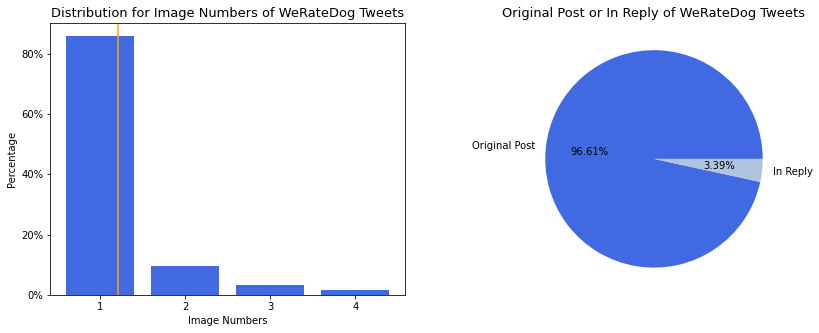

In [623]:
plt.figure(figsize=(14, 5));

plt.subplot(1, 2, 1)
image_mean = df.img_num.mean()
plt.bar(df.img_num.value_counts().index, df.img_num.value_counts()/df.img_num.value_counts().sum(), color='royalblue');
ticks = [1, 2, 3, 4];
labels = ['{}'.format(h) for h in ticks];
plt.xticks(ticks, labels);
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]);
plt.axvline(image_mean, color = 'orange');
plt.xlabel('Image Numbers');
plt.ylabel('Percentage');
plt.title('Distribution for Image Numbers of WeRateDog Tweets', fontsize=13);

plt.subplot(1, 2, 2)
reply_count = df.in_reply.value_counts()
plt.pie(reply_count, labels = ['Original Post', 'In Reply'], autopct = '%.2f%%', 
        colors = ['royalblue', 'lightsteelblue']);
plt.title('Original Post or In Reply of WeRateDog Tweets', fontsize = 13);

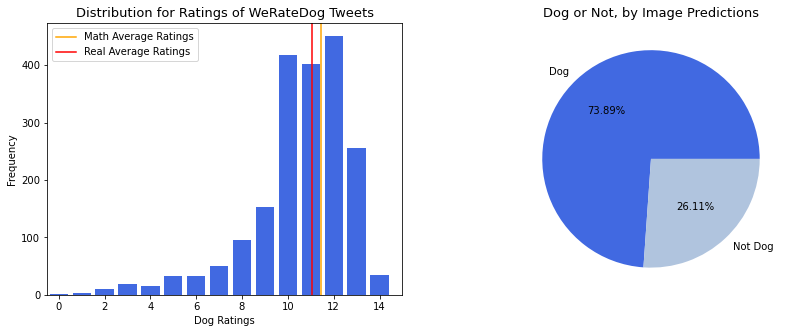

In [624]:
plt.figure(figsize=(14, 5));

plt.subplot(1, 2, 1)
ratings = df.rating_numerator.value_counts()
plt.bar(ratings.index, ratings.values, color='royalblue');
plt.xlim((-.5, 15));
plt.axvline(11.438605, color = 'orange');
mean_real = df.query("7 < rating_numerator < 20").rating_numerator.mean()
plt.axvline(mean_real, color = 'red');
plt.legend(labels = ['Math Average Ratings', 'Real Average Ratings']);
plt.xlabel('Dog Ratings');
plt.ylabel('Frequency');
plt.title('Distribution for Ratings of WeRateDog Tweets', fontsize=13);

plt.subplot(1, 2, 2)
test1 = df.p1_dog.value_counts()
test2 = df.p2_dog.value_counts()
test3 = df.p3_dog.value_counts()
test_result = test1 + test2 + test3
plt.pie(test_result, labels = ['Dog', 'Not Dog'], autopct = '%.2f%%', 
        colors = ['royalblue', 'lightsteelblue']);
plt.title('Dog or Not, by Image Predictions', fontsize = 13);

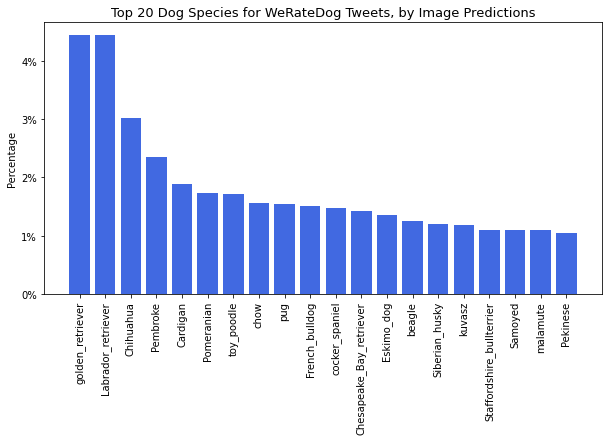

In [625]:
plt.figure(figsize=(10, 5));
prediction = df.p1.append(df.p2)
prediction = prediction.append(df.p3)
total = len(prediction)
top10_pred = prediction.value_counts()[:20]
plt.bar(top10_pred.index, top10_pred/total, color='royalblue');
plt.xticks(rotation = 90);
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]);
plt.ylabel('Percentage');
plt.title('Top 20 Dog Species for WeRateDog Tweets, by Image Predictions', fontsize=13);

# <font color='crimson'>Conclusions</font>

> <li>After data cleaning, we can found most photos with ratings under 8 are not dog photos.</li><li>Only two ratings are larger than 15, one is 1776 for a dog in front of U.S. flag, and a 420 one for Snoop Dogg.</li><li>Distribution for retweet and favorite counts of WeRateDog tweets are right-skewed, with averages around 2350 and 8000 respectively.</li><li>86% of tweets only have 1 photo, while 1.5% of them have 4 photos. 3.4% of ratings are given in reply, not original posts.</li><li>Most dogs get 10~12 points out of 10, with an average of 11. Average will be smaller when exclude outliers and non-dog photos.</li><li>By image prediction, most frequent dog species are labrador retriever, golden retriever and chihuahua, and 26% images are not dogs.</li>

## <font color='royalblue'>Thanks</font>